Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


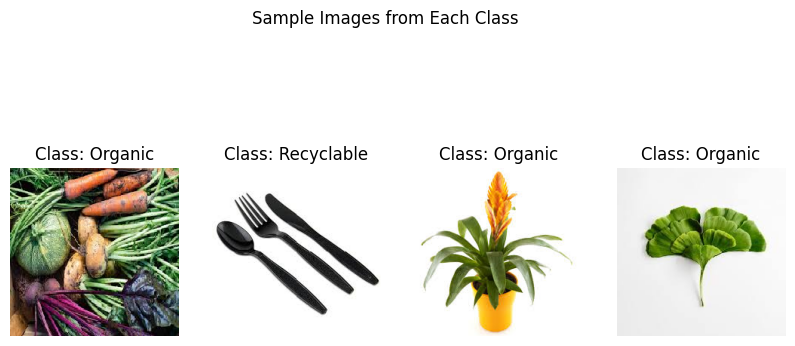

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
# Set up directories (update these paths to match your local file system)
base_dir = r"C:/Users/ASUS/Downloads/Waste-Sorting/DATASET/DATASET"# Replace with your actual path
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)  # Use next() to get a batch of images
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [2]:
#include_top=False: Excludes the fully connected layers at the top of MobileNetV2
#weights='imagenet': Uses pre-trained weights from the ImageNet dataset
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezes all the layers in the pre-trained MobileNetV2 to ensures that only the custom layers willlearn from new data
mobilenet_model.trainable = False  

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(), #reduces the spatial dimensions of single vector(summation of matrix)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R.

In [3]:
history = model.fit(train_data,validation_data=test_data, epochs=5)
model.save('Waste_Sorting_Model1.h5')
loss,accuracy = model.evaluate(test_data)
print("Model Accuracy",accuracy)

Epoch 1/5


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 1356s 2s/step - accuracy: 0.8665 - loss: 0.3075 - val_accuracy: 0.8862 - val_loss: 0.2670
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 1339s 2s/step - accuracy: 0.9322 - loss: 0.1720 - val_accuracy: 0.9029 - val_loss: 0.2321
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 1351s 2s/step - accuracy: 0.9377 - loss: 0.1618 - val_accuracy: 0.9065 - val_loss: 0.2289
Epoch 4/5
  3/706 ━━━━━━━━━━━━━━━━━━━━ 19:55 2s/step - accuracy: 0.9497 - loss: 0.1542

KeyboardInterrupt: 

In [4]:
model.save('Waste_Sorting_Model1.h5')
loss,accuracy = model.evaluate(test_data)
print("Model Accuracy",accuracy)

79/79 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9127 - loss: 0.2124
Model Accuracy 0.908475935459137


79/79 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.55      0.59      0.57      1401
  Recyclable       0.43      0.38      0.40      1112

    accuracy                           0.50      2513
   macro avg       0.49      0.49      0.49      2513
weighted avg       0.49      0.50      0.50      2513

Confusion Matrix:
 [[833 568]
 [688 424]]


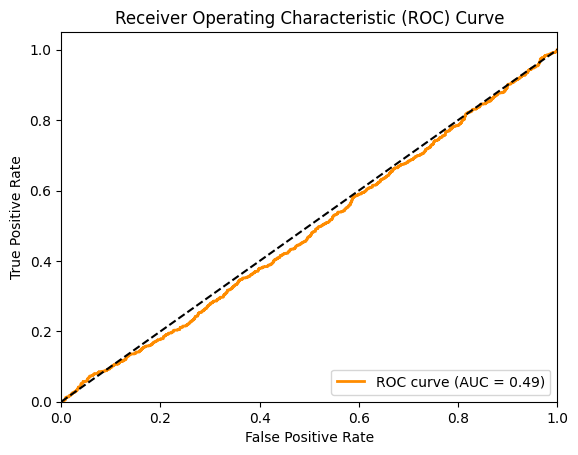

In [6]:
#Evaluation

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
y_true = test_data.classes  # True labels from test data

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


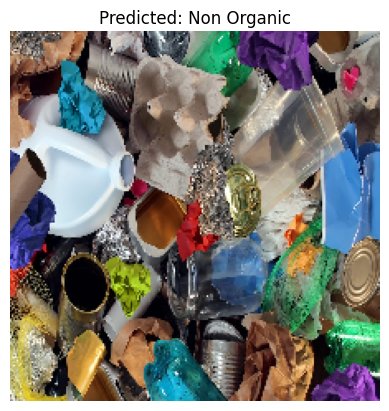

In [7]:
#Testing

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the trained model and test image
model_path = "C:/Users/ASUS/Desktop/Waste_Sorting_Model1.h5"
test_image_path = r"C:/Users/ASUS/Downloads/what-can-be-recycled.jpg"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Load and prepare the test image
test_img = load_img(test_image_path, target_size=(224, 224))  # Load image and resize
test_img_array = img_to_array(test_img) / 255.0  # Normalize pixel values
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add batch dimension

# Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

# Display the test image and prediction
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()